In [ ]:
""" 최단경로문제 - 가장 짧은 경로를 찾는 알고리즘
** 다양한 문제상황
- 한지점에서 다른 한 지점까지의 최단 경로
- 한 지점에서 다른 모든 지점까지의 최단경로
- 모든 지점에서 다른 모든 지점까지의 최단경로

* 노드 : 그래프에서의 각 지점까지의 지점
* 간선 : 지점 간 연결된 도로

** 길찾기 자체가 간 길을 기억하고 있어야하기 때문에 다이나믹 프로그래밍의 일부임
"""

In [ ]:
""" 다익스트라 최단 경로 알고리즘
** 개요
- 특정한 노드에서 출발하여 다른 모든 노드로 가는 최단 경로를 계산
- 다익스트라 최단경로 알고리즘은 음의 간선이 없을 때 정상적으로 작동
(현실 세계에서의 도로는 임의의 간선이 없기 때문에 적용되기 좋음)
- 다익스트라 최단경로 알고리즘은 그리디 알고리즘으로 분류
(매 상황에서 가장 비용이 적은 노드를 선택해 임의의 과정을 반복)


** 동작과정
1. 출발 노드를 설정합니다
2. 최단 거리 테이블을 초기화합니다.(거리 비용이 무한/ 자기 자신은 0)
3. 방문하지 않은 노드 중에서 최단 거리가 짧은 노드를 선택합니다
4. 해당 노드를 거쳐 다른 노드로 가는 비용을 계산하여 최단 거리 테이블을 갱신합니다.
5. 위 과정을 3~4번 반복합니다.
>> 방문하지 않은 노드 중에서 최단 거리가 가장 짧은 노드를 선택한다는 면에서 그리디 알고리즘
3번 과정을 통해 현재 방문하지 않은 노드 중에서 최단거리가 가장 짧은 것을 선택하는 과정을 할 떄마다 그렇게 선택한 노드까지의 거리가 바뀌지 않음
매번 현재를 기준으로하여 최단거리가 가장 짧은 노드를 선택하는 과정을 반복할 때마다 최단거리를 확실히 결정하는 것과 같다고 볼 수 있다.
가장 최단 거리가 짧은 노드를 선택하는 것을 반복함으로써 모든 노드에 대해서 다 방문처리가 끝났을 때 우리는 전체 노드까지의 최단거리를 알 수 있게된다.
>> 각 노드까지의 최단 거리만 알 수 있고, 우리가 완전한 형태의 최단 경로까지 알기 위해서는 별도의 로직이 사용되어야함.

** 특징
- 그리디 알고리즘 : 매 상황에서 방문하지 않은 가장 비용이 적은 노드를 선택해 임의의 과정을 반복한다
- 단계를 거치며 한 번 처리된 노드의 최단거리는 고정되어 더 이상 바뀌지 않습니다
> 한 계단당 하나의 노드에 대한 최단거리를 확실히 하는 것으로 이해할 수 있습니다
- 다익스트라 알고리즘을 수행한 뒤에 테이블에 각 노드까지의 최단거리 정보가 저장됩니다
> 완벽한 형태의 최단경로를 구하려면 소스코드에 추가적인 기능을 더 넣어야합니다.

** 구현방법
1. 단계마다 방문하지 않은 노드 중에서 최단 거리가 가장 짧은 노드를 선택하기 위해 매 단계마다 1차원 테이블의 모든 원소를 확인(순차탐색)합니다.
"""
import sys

input = sys.stdin.readline
INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

# 노드의 갯수, 간선의 갯수 입력받기
n, m = map(int, input().rstrip().split())
# 시작 노드 번호를 입력하기
start = int(input())
# 각 노드에 연결되어 있는 노드에 대한 정보를 담는 리스트를 만들기
graph = [[] for i in range(n+1)]
#방문한적이 있는 지 체크하는 목적의 리스트 만들기
visited = [False] * (n+1)
# 최단 거리 테이블을 모두 무한으로 초기화합니다
distance = [INF] * (n+1)

# 모든 간선 정보를 입력받기
for _ in range(m) :
  a, b, c = map(int, input().rstrip().split()) 
  # a 노드에서 b번 노드로 가는 비용이 c라는 의미
  # 1 3 10
  graph[a].append((b,c))

# 방문하지 않은 노드 중에서, 가장 최단 거리가 짧은 노드의 번호를 반환
def get_smallest_node() :
  min_value = INF
  index = 0
  for i in range(1, n+1) :
    if distance[i] < min_value and not visited[i] :
      min_value = distance[i]
      index =1
    return index

def dijkstra(start) :
  # 시작 노드에 대해서 초기화
  distance[start] =0
  visited[start] = True
  for j in graph[start] :
    distance[j[0]] = j[1]
  # 시작 노드를 제외한 전체 n-1개의 노드에 대해 반복
  for i in range(n-1) :
    #현재 최단 거리가 가장 짧은 노드를 꺼내서, 방문 처리
    now = get_smallest_node()
    visited[now] = True
    #현재 노드와 연결된 다른 노드를 확인
    for j in graph[now] :
      cost = distance[now] +j[1]
      #현재 노드를 거쳐서 다른 노드로 이동하는 거리가 더 짧은 경우
      if cost < distance[j[0]] :
        distance[j[0]] = cost

# 다익스트라 알고리즘을 수행
dijkstra(start)

# 모든 노드로 가기 위한 최단 거리를 출력
for i in range(1, n+1) :
  #도달할 수 없는 경우 무한(INF)이라고 출력
  if distance[i] == INF :
    print("INFINITY")
  #도달할 수 있는 경우 거리를 출력
  else :
    print(distance[i])

In [ ]:
""" 간단한 구현 방법 성능 분석
* 총 O(V) 번에 걸쳐서 최단 거리가 가장 짧은 노드를 매번 선형 탐색해야 합니다
* 따라서 전체 시간 복잡도는 O(V**2)입니다
* 일반적으로 코딩 테스트의 최단 경로 문제에서 전체 노드의 개수가 5000개 이하라면 이 코드로 문제를 해결할 수 있습니다
- 하지만 노드의 개수가 10000개가 넘어가는 문제라면?
"""

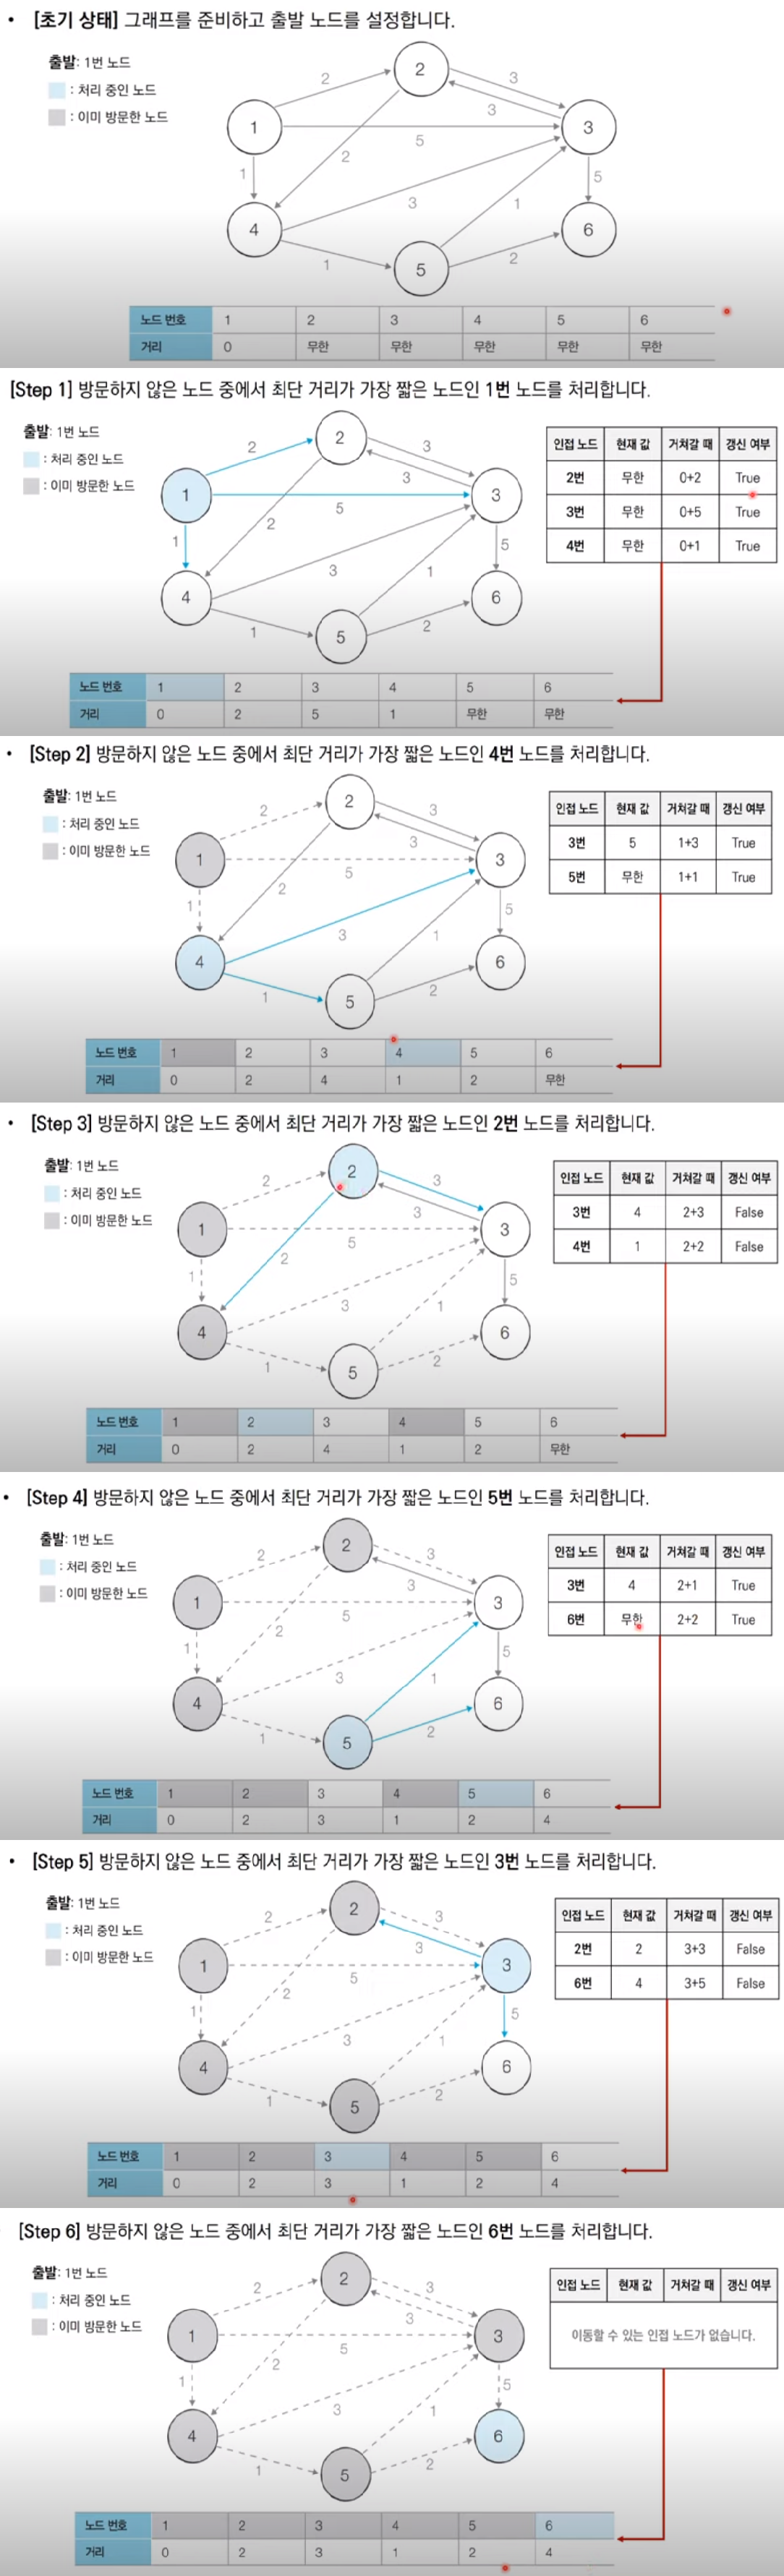

In [7]:
import glob
from PIL import Image

def calculateSize(files) :
    size_x =[]
    size_y =[]
    
    for file in files :
        image = Image.open(file)
        size_x.append(image.size[0])
        size_y.append(image.size[1])
    
    x_min = min(size_x)
    y_min = min(size_y)
    total_y_size = y_min * len(files)
        
    return x_min, y_min, total_y_size

def resizeToMin(files, x_min, y_min, y_size) :
    file_list = []
    
    for file in files :
        image = Image.open(file)
        resized_file = image.resize((x_min, y_min))
        file_list.append(resized_file)
    return file_list, y_size, x_min, y_min
    
def imageMerge(file_list, y_size, x_min, y_min) :
    new_image = Image.new("RGB", (x_min, y_size), (256,256,256))
    for index in range(len(file_list)) :
        area =(0, (index * y_min), x_min, (index+1)* y_min)
        # (0, (index * y_min), x_min, (y_min * (index+1)))
        new_image.paste(file_list[index], area)
    return new_image



target_dir="./img/최단경로/"
files = glob.glob(target_dir+"*.*")

x_min, y_min, y_size = calculateSize(files)
file_list, y_size, x_min, y_min = resizeToMin(files, x_min, y_min, y_size)

img = imageMerge(file_list, y_size, x_min, y_min)
img

In [8]:
""" 우선순위 큐(Priority Queue)
* 우선 순위가 가장 높은 데이터를 가장 먼저 삭제하는 자료구조입니다.
* 예를 들어 여러 개의 물건 데이터를 자료구조에 넣었다가 가치가 높은 물건 데이터부터 꺼내서 확인해야 하는 경우 우선순위 큐를 이용할 수 있다.
* python, c++, java 를 포함한 대부분의 프로그래밍언어에서 표준 라이브러리 형태로 제공

** 우선순위 큐 구현 - 힙 이용
- 우선순위 큐(Priority Queue)를 구현하기 위해 사용하는 자료구조 중 하나
- 최소 힙(Min Heap)과 최대 힙(Max Heap)이 있습니다
    최소힙 : 값이 낮은 데이터부터 꺼냄
    최대힙 : 값이 높은 데이터부터 꺼냄
- 다익스트라 최단 경로 알고리즘을 포함해 다양한 알고리즘에서 사용됩니다.
- 우선 순위 큐 구현 방식 , 삽입시간, 삭제시간
  리스트, O(1), O(N)
  힙, O(logN), O(logN)

"""
import heapq

# 오름차순 힙 정렬(Heap Sort)
def heapsort(iterable) :
  h = []
  result=[]
  # 모든 원소를 차례대로 힙에 삽입
  for value in iterable :
    heapq.heappush(h, value)
  # 힙에 삽입된 모든 원소를 차례대로 꺼내어 담기
  for i in range(len(h)) :
    result.append(heapq.heappop(h))
  return result

result = heapsort([1,3,5,7,9,2,4,6,8,0])
print(result)
  

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
